In [1]:
def split(x,y):
    n =(len(x)*3)//4
    trainx = np.zeros(n)
    trainy = np.zeros(n)
    testx = np.zeros(len(x)-n)
    testy = np.zeros(len(x)-n)
    
    indtrain =0
    
    indtest =0
    for a in range(len(x)):
        if (a % 4 !=0 ):
            trainx[indtrain]=x[a]
            trainy[indtrain]=y[a]
            indtrain=indtrain+1

        else : 
            testx[indtest]=x[a]
            testy[indtest]=y[a]
            indtest=indtest+1
    
    return trainx,trainy ,testx , testy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#it is a supervised learning 
data=pd.read_csv("dataset2.csv")
x=np.array(data['ENGINESIZE']).reshape(-1, 1)
y=np.array(data['CO2EMISSIONS']).reshape(-1, 1)
trainx,trainy,testx,testy=split(x,y)


In [3]:
moyenne = np.mean(x)
print(moyenne)

3.346298031865042


In [4]:
def my_median(sample):
  n = len(sample)
  index = n // 2
  # Sample with an odd number of observations
  if n % 2:
    return sorted(sample)[index]
  # Sample with an even number of observations
  return sum(sorted(sample)[index - 1:index + 1]) / 2


In [5]:
def normalize(x):
  X = np.zeros(len(x))
  for i in range (len(x)):
    X[i] = (x[i] - np.mean(x))/ np.sqrt((np.var(x)))
  return X


In [30]:
def h( x ,  theta ):
  return theta[0]+theta[1]*x 

In [31]:
def calculate_prediction(x, theta ):
  prediction = np.zeros(len(x))
  for i in range(0,len(x)):
    prediction[i]= h(x[i],theta)
  return prediction


In [7]:
def puissance(x,degre):
  l =len(x)
  res = np.zeros(l)
  for i  in range(0, l):
    res[i]=x[i]**degre
  return res

In [8]:
def f(x, theta , y):
  l =len(x)
  res = np.zeros(l)
  predictions = calculate_prediction(x, theta);
  diff = predictions-y
  ls = puissance(diff,2)
  res = (1.0/l) *np.sum(ls)
  return res

In [9]:
def armijo(x,y,d,theta):
    alpha = 1
    eps =0.0001
    while(f(x,theta+np.multiply(d,alpha),y) - f(x,theta,y) > -1.0*alpha*eps*np.sum(puissance(d,2))):
        alpha = alpha/2
        thetha=theta+np.multiply(d,alpha)
    return alpha;

In [11]:
def gradient_descent(x,y,alpha):
    theta = [0] *2
    vectnorm=[0]*2
    predictions = calculate_prediction(x, theta)
    diff = predictions-y
    errors_x1 = diff
    errors_x2 = diff*x
    vectnorm[0]=(1.0 / len(x))*np.sum(errors_x1)
    vectnorm[1]=(1.0 / len(x))*np.sum(errors_x2)
    d=np.linalg.norm(vectnorm)
    while (d>0.001):
        predictions = calculate_prediction(x, theta)
        diff = predictions-y
        errors_x1 = diff
        errors_x2 = diff*x
        theta[0] = theta[0] - alpha * (1.0 / len(x)) * np.sum(errors_x1)
        theta[1] = theta[1] - alpha * (1.0 / len(x)) * np.sum(errors_x2)
        vectnorm[0]=(1.0 / len(x))*np.sum(errors_x1)
        vectnorm[1]=(1.0 / len(x))*np.sum(errors_x2)
        d=np.linalg.norm(vectnorm)
    return theta;

In [12]:
def gradient_descent_armijo(x,y):
    theta =[0.5] *2
    d=[0] *2
    predictions = calculate_prediction(x, theta);
    diff = predictions-y
    errors_x1 = diff
    errors_x2 = diff*x
    d[0]=-(1.0 / len(x))*np.sum(errors_x1)
    d[1]=-(1.0 / len(x))*np.sum(errors_x2)
    nor=np.linalg.norm(d)
    #k=f(x,theta,y)
    pas=1.0
    while (nor>0.001):
        predictions = calculate_prediction(x, theta)
        diff = predictions-y
        errors_x1 = diff;
        errors_x2 = diff*x
        pas=armijo(x,y,d,theta)       
        theta[0] = theta[0] - pas * (1.0 / len(x)) * np.sum(errors_x1)
        theta[1] = theta[1] - pas * (1.0 / len(x)) * np.sum(errors_x2)
        d[0]=-(1.0 / len(x))*np.sum(errors_x1)
        d[1]=-(1.0 / len(x))*np.sum(errors_x2)
        nor=np.linalg.norm(d)
    return theta;

In [13]:
theta1=gradient_descent(normalize(trainx),normalize(trainy),0.01)

In [14]:
f(normalize(trainx),theta1,normalize(trainy))

0.21897378033388074

In [15]:
theta2=gradient_descent(normalize(trainx),normalize(trainy),0.02)

In [16]:
f(normalize(trainx),theta2,normalize(trainy))

0.21897377222866815

In [17]:
theta3=gradient_descent(normalize(trainx),normalize(trainy),0.03)

In [18]:
f(normalize(trainx),theta3,normalize(trainy))

0.21897374489903862

In [19]:
theta4=gradient_descent_armijo(normalize(trainx),normalize(trainy))

In [20]:
f(normalize(trainx),theta4,normalize(trainy))

0.21897281934218854

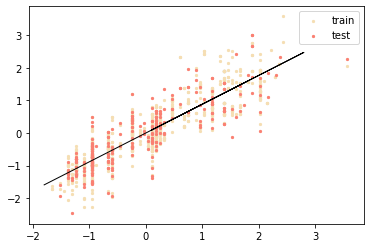

In [21]:
#scatter theta1 pour pas=0.01
plt.scatter(normalize(trainx),normalize(trainy),color='wheat',s=5,label="train")
plt.scatter(normalize(testx),normalize(testy),color='salmon',s=5,label="test")
plt.legend()
xx=[1.8,0.10,2.8,-1.8]
plt.plot(xx, calculate_prediction(xx,theta1), color='black', lw=1)

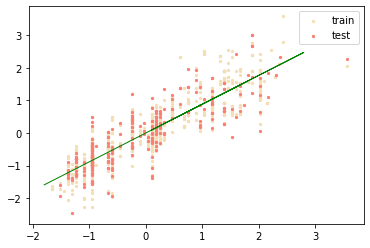

In [22]:
#scatter 2 pour pas=0.02
plt.scatter(normalize(trainx),normalize(trainy),color='wheat',s=5,label="train")
plt.scatter(normalize(testx),normalize(testy),color='salmon',s=5,label="test")
plt.legend()
plt.plot(xx, calculate_prediction(xx,theta2),  color='green', lw=1)

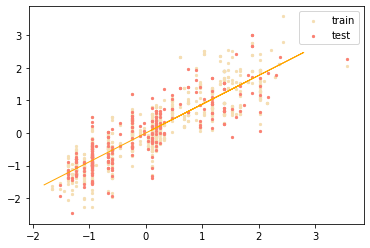

In [23]:
#scatter theta3 pour pas=0.03
plt.scatter(normalize(trainx),normalize(trainy),color='wheat',s=5,label="train")
plt.scatter(normalize(testx),normalize(testy),color='salmon',s=5,label="test")
plt.legend()
plt.plot(xx, calculate_prediction(xx,theta3),  color='orange', lw=1)

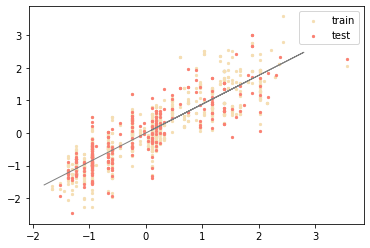

In [24]:
#scatter theta4 pour pas d'armijo
plt.scatter(normalize(trainx),normalize(trainy),color='wheat',s=5,label="train")
plt.scatter(normalize(testx),normalize(testy),color='salmon',s=5,label="test")
plt.legend()
plt.plot(xx, calculate_prediction(xx,theta4),  color='grey', lw=1)

In [25]:
#variance
var = (1/len(calculate_prediction(normalize(trainx), theta1)))*np.sum((calculate_prediction(normalize(trainx), theta1)- np.mean(calculate_prediction(normalize(trainx), theta1)))**2)
print("variance : " ,var)


# mean squared error
mse1 = np.sum((calculate_prediction(normalize(testx), theta1) - normalize(testy))**2)
mse2 = np.sum((calculate_prediction(normalize(testx), theta2) - normalize(testy))**2)
mse3 = np.sum((calculate_prediction(normalize(testx), theta3) - normalize(testy))**2)
mse4 = np.sum((calculate_prediction(normalize(testx), theta4) - normalize(testy))**2)
# m is the number of training examples
rmse1 = mse1/len(testx)
rmse2 = mse2/len(testx)
rmse3 = mse3/len(testx)
rmse4 = mse4/len(testx)
print("bias for alpha=0.01 : ", rmse1)
print("bias for alpha=0.02 : ", rmse2)
print("bias for alpha=0.03 : ", rmse3)
print("bias armijo learning rate : ",rmse4)

variance :  0.7792954436008388
bias for alpha=0.01 :  0.28521359547607483
bias for alpha=0.02 :  0.28521389822831433
bias for alpha=0.03 :  0.28521492893173445
bias armijo learning rate :  0.2852861921367199


In [26]:
h = normalize(trainy) - calculate_prediction(normalize(trainx), theta1)
v = h**2
print("la variance",np.mean(v)/len(h))

la variance 0.00027371722541735095


In [32]:
errgen= np.sum((calculate_prediction(normalize(testx), theta1) -normalize(testy))**2)
errgen1= np.sqrt(errgen/len(testx))
errgen= np.sum((calculate_prediction(normalize(testx), theta2) -normalize(testy))**2)
errgen2= np.sqrt(errgen/len(testx))
errgen= np.sum((calculate_prediction(normalize(testx), theta3) -normalize(testy))**2)
errgen3= np.sqrt(errgen/len(testx))
errgen= np.sum((calculate_prediction(normalize(testx), theta4) -normalize(testy))**2)
errgen4= np.sqrt(errgen/len(testx))
print("generalization error for alpha=0.01 : ", errgen1)
print("generalization error for alpha=0.02 : ", errgen2)
print("generalization error for alpha=0.03 : ", errgen3)
print("generalization error armijo learning rate : ", errgen4)

generalization error for alpha=0.01 :  0.5340539256255634
generalization error for alpha=0.02 :  0.5340542090727441
generalization error for alpha=0.03 :  0.534055174052021
generalization error armijo learning rate :  0.534121888838793


In [33]:
def accuracy(err,y):
    return sum(err**2)/sum((y-np.mean(y))**2)

In [34]:
print("accuracy for alpha=0.01 : ",accuracy(calculate_prediction(normalize(trainx), theta1),normalize(trainy)))
print("accuracy for alpha=0.02 : ",accuracy(calculate_prediction(normalize(trainx), theta2),normalize(trainy)))
print("accuracy for alpha=0.03 : ",accuracy(calculate_prediction(normalize(trainx), theta3),normalize(trainy)))
print("accuracy armijo learning rate  : ",accuracy(calculate_prediction(normalize(trainx), theta4),normalize(trainy)))

accuracy for alpha=0.01 :  0.7792954436008401
accuracy for alpha=0.02 :  0.7793027579438526
accuracy for alpha=0.03 :  0.7793276532666258
accuracy armijo learning rate  :  0.7810271806578136
